In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [12]:
image_size=(150, 150) # (height, width)
batch_size=32

training_set_PATH = "./Face-Images/Face Images/Final Training Images"
training_set = keras.utils.image_dataset_from_directory(training_set_PATH, validation_split=0.2, seed=123, subset="training", image_size=image_size, batch_size=batch_size)
val_set = keras.utils.image_dataset_from_directory(training_set_PATH, validation_split=0.2, seed=123, subset="validation", image_size=image_size, batch_size=batch_size)

Found 244 files belonging to 16 classes.
Using 196 files for training.
Found 244 files belonging to 16 classes.
Using 48 files for validation.


In [9]:
faceID = training_set.class_names

## Creating The Model

### Data Augmentation

In [13]:
data_augmentation  = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(image_size[0],image_size[1],3)),
    keras.layers.RandomRotation(0.1)
])

### Creating the CNN

In [27]:
output_neurons_NUM = 16
face_recognizer = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(image_size[0],image_size[1],3)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(output_neurons_NUM, activation="softmax")
])

In [28]:
face_recognizer.compile(optimizer="adam", 
                        loss=keras.losses.SparseCategoricalCrossentropy(), 
                        metrics=["accuracy"])

In [29]:
face_recognizer.fit(training_set, validation_data=val_set, epochs=30)

Epoch 1/30
7/7 [==============================] - 2s 209ms/step - loss: 4.4628 - accuracy: 0.0408 - val_loss: 2.8050 - val_accuracy: 0.0417
Epoch 2/30
7/7 [==============================] - 1s 196ms/step - loss: 2.7667 - accuracy: 0.1173 - val_loss: 2.7431 - val_accuracy: 0.1667
Epoch 3/30
7/7 [==============================] - 1s 194ms/step - loss: 2.7319 - accuracy: 0.1480 - val_loss: 2.8120 - val_accuracy: 0.1250
Epoch 4/30
7/7 [==============================] - 1s 195ms/step - loss: 2.6905 - accuracy: 0.2245 - val_loss: 2.7242 - val_accuracy: 0.1250
Epoch 5/30
7/7 [==============================] - 1s 194ms/step - loss: 2.6567 - accuracy: 0.1224 - val_loss: 2.6981 - val_accuracy: 0.1042
Epoch 6/30
7/7 [==============================] - 1s 195ms/step - loss: 2.5956 - accuracy: 0.1684 - val_loss: 2.5721 - val_accuracy: 0.1042
Epoch 7/30
7/7 [==============================] - 1s 197ms/step - loss: 2.4917 - accuracy: 0.2398 - val_loss: 2.5505 - val_accuracy: 0.2500
Epoch 8/30
7/7 [====

## Predicting

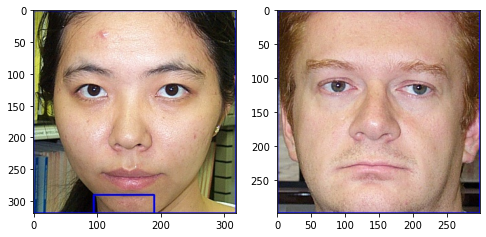

In [24]:
from PIL import Image

image31_PATH = "./Face-Images/Face Images/Final Testing Images/face3/1face3.jpg"
image23_PATH = "./Face-Images/Face Images/Final Testing Images/face2/3face2.jpg"
image31 = Image.open(image31_PATH)
image23 = Image.open(image23_PATH)
ax = plt.figure(figsize=(8,8)).subplots(1,2)
ax[0].imshow(image31)
ax[1].imshow(image23)

In [30]:
from tensorflow.keras.preprocessing import image

image31 = image.load_img(image31_PATH, target_size=image_size)
image23 = image.load_img(image23_PATH, target_size=image_size)
test_image31 = image.img_to_array(image31)
test_image23 = image.img_to_array(image23)
test_image31 = np.expand_dims(test_image31, 0)
test_image23 = np.expand_dims(test_image23, 0)
pred31 = face_recognizer.predict(test_image31)
pred23 = face_recognizer.predict(test_image23)
print("Image 1 belongs to class face3 and the model predicted it in class {0}.".format(faceID[np.argmax(pred31)]))
print("Image 2 belongs to class face2 and the model predicted it in class {0}.".format(faceID[np.argmax(pred23)]))

Image 1 belongs to class face3 and the model predicted it in class face3.
Image 2 belongs to class face2 and the model predicted it in class face2.


## Saving The Model

In [31]:
face_recognizer.save_weights('checkpoints/checkpoint2')